<a href="https://colab.research.google.com/github/shyamsolanke/ds_hw/blob/main/CMSC_HW5_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 5 Questions

Same drill as Homework 3, the following questions are intended to get you familiarized with the [provided dataset](https://docs.google.com/spreadsheets/d/1tcqGAlaBOd9L9Lhb9u9_nUg9dSRY1usF80l2RNKiQN0/edit?usp=sharing). By answering these questions, it will hopefully give insights on how to complete the actual task (slide deck generation for the CEO).

Please answer each of the questions below in the space provided. Copy the noteook, and when you're done, submit as an ipynb file. This will be graded on correctness. Please comment your code to help the grader figure out what you're doing. If you do a hypothesis test, please report all relevant p-values in the text field.

Imports and data loading:

In [99]:
import pandas as pd
import requests
url = "https://raw.githubusercontent.com/shyamsolanke/ds_hw/refs/heads/main/GPA%20Dataset%20(Let's%20get%20spicy)%20(Responses)%20-%20Form%20Responses%201.csv"
df_raw = pd.read_csv(url)

Data cleaning:

In [100]:
df_raw.columns

Index(['Timestamp', 'What state are you from?', 'Major (Check all that apply)',
       'At what age did you start programming?',
       'Have you at any point attended private school?',
       'Do you have a scholarship?', 'Do you have a parent in tech?',
       'Do you study with friends?', 'Do you take notes in classes?',
       'How many credits did you take last semester?',
       'What is your average screentime?',
       'What is your average daily time on Tik Tok or Tik Tok equivalents?',
       'How many hours of sleep do you get a night?',
       'What was your GPA LAST SEMESTER?',
       'What was your GPA THE SEMESTER BEFORE THAT?'],
      dtype='object')

In [101]:
# replacing null values with "no"
df_raw["Do you have a scholarship?"] = df_raw["Do you have a scholarship?"].fillna("no")

In [102]:
df_raw.isna().sum()

,0
Timestamp,0
What state are you from?,1
Major (Check all that apply),0
At what age did you start programming?,1
Have you at any point attended private school?,0
Do you have a scholarship?,0
Do you have a parent in tech?,0
Do you study with friends?,0
Do you take notes in classes?,0
How many credits did you take last semester?,0


In [103]:
df_raw.dropna(inplace = True)

In [104]:
df_raw["At what age did you start programming?"].value_counts()

,count
At what age did you start programming?,
12.0,9
17.0,9
15.0,7
18.0,7
13.0,7
14.0,6
16.0,6
11.0,5
10.0,4


In [105]:
# removing the data saying started programming at the age 1
df_raw = df_raw[df_raw["At what age did you start programming?"] > 2]

In [106]:
# removing outliers from average screen time columns
df_raw = df_raw[df_raw["What is your average screentime?"] < 50]

In [107]:
df_raw["Have you at any point attended private school?"].value_counts()

,count
Have you at any point attended private school?,
No,48
Yes,14


In [108]:
df_raw.columns

Index(['Timestamp', 'What state are you from?', 'Major (Check all that apply)',
       'At what age did you start programming?',
       'Have you at any point attended private school?',
       'Do you have a scholarship?', 'Do you have a parent in tech?',
       'Do you study with friends?', 'Do you take notes in classes?',
       'How many credits did you take last semester?',
       'What is your average screentime?',
       'What is your average daily time on Tik Tok or Tik Tok equivalents?',
       'How many hours of sleep do you get a night?',
       'What was your GPA LAST SEMESTER?',
       'What was your GPA THE SEMESTER BEFORE THAT?'],
      dtype='object')

In [109]:
from sklearn.preprocessing import LabelEncoder
# creating a encoded dataframe

categorical_columns = ['What state are you from?','Major (Check all that apply)','Have you at any point attended private school?','Do you have a scholarship?',
                                             'Do you have a parent in tech?', 'Do you study with friends?', 'Do you take notes in classes?']

df_raw_encoded = df_raw.copy()

for i in categorical_columns:
  new_column_name = i + "_encoded"
  df_raw_encoded[new_column_name] = LabelEncoder().fit_transform(df_raw_encoded[i])

df_raw_encoded.drop(categorical_columns, axis = 1,  inplace=True)


In [110]:
# Dropping Timestamp column
df_raw_encoded.drop("Timestamp", axis = 1,  inplace=True)

In [111]:
df_raw_encoded

,At what age did you start programming?,How many credits did you take last semester?,What is your average screentime?,What is your average daily time on Tik Tok or Tik Tok equivalents?,How many hours of sleep do you get a night?,What was your GPA LAST SEMESTER?,What was your GPA THE SEMESTER BEFORE THAT?,What state are you from?_encoded,Major (Check all that apply)_encoded,Have you at any point attended private school?_encoded,Do you have a scholarship?_encoded,Do you have a parent in tech?_encoded,Do you study with friends?_encoded,Do you take notes in classes?_encoded
0,14.0,16,5.0,2.0,7.0,2.780,2.600,3,0,0,2,0,2,2
1,8.0,17,3.5,1.0,7.0,3.900,3.700,8,0,0,1,2,2,3
2,14.0,17,6.5,2.0,8.0,3.900,4.000,2,0,0,1,0,0,3
3,14.0,18,6.0,2.0,8.0,4.000,4.000,8,0,0,1,1,0,3
4,11.0,15,5.0,1.0,8.0,4.000,4.000,0,3,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,16.0,15,5.5,1.0,8.0,3.557,3.504,2,0,0,2,1,2,3
69,15.0,17,10.0,1.0,8.0,4.000,4.000,2,0,0,0,0,1,3
70,17.0,16,5.0,2.0,5.0,3.500,3.700,2,0,0,2,0,1,3
71,15.0,17,9.0,3.0,6.0,3.894,3.940,3,0,0,2,1,0,3


In [112]:
from sklearn.ensemble import RandomForestRegressor
# Split data into features and target
X = df_raw_encoded[['At what age did you start programming?',
       'How many credits did you take last semester?',
       'What is your average screentime?',
       'What is your average daily time on Tik Tok or Tik Tok equivalents?',
       'How many hours of sleep do you get a night?',
       'What was your GPA THE SEMESTER BEFORE THAT?',
       'What state are you from?_encoded',
       'Major (Check all that apply)_encoded',
       'Have you at any point attended private school?_encoded',
       'Do you have a scholarship?_encoded',
       'Do you have a parent in tech?_encoded',
       'Do you study with friends?_encoded',
       'Do you take notes in classes?_encoded']]

y = df_raw_encoded['What was your GPA LAST SEMESTER?']

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importance
importance = model.feature_importances_
feature_names = X.columns

# Display feature importance
for name, score in zip(feature_names, importance):
    print(f"Feature: {name}, Importance: {score}")

Feature: At what age did you start programming?, Importance: 0.048287440024464424
Feature: How many credits did you take last semester?, Importance: 0.05908657159577378
Feature: What is your average screentime?, Importance: 0.06361940067762506
Feature: What is your average daily time on Tik Tok or Tik Tok equivalents?, Importance: 0.026306495635719716
Feature: How many hours of sleep do you get a night?, Importance: 0.016066094569380247
Feature: What was your GPA THE SEMESTER BEFORE THAT?, Importance: 0.6898740586413696
Feature: What state are you from?_encoded, Importance: 0.015612697232332247
Feature: Major (Check all that apply)_encoded, Importance: 0.00394362839882632
Feature: Have you at any point attended private school?_encoded, Importance: 0.006494415837002828
Feature: Do you have a scholarship?_encoded, Importance: 0.02795684477509258
Feature: Do you have a parent in tech?_encoded, Importance: 0.01715668290593452
Feature: Do you study with friends?_encoded, Importance: 0.00803

In [113]:
df_raw_encoded.columns

Index(['At what age did you start programming?',
       'How many credits did you take last semester?',
       'What is your average screentime?',
       'What is your average daily time on Tik Tok or Tik Tok equivalents?',
       'How many hours of sleep do you get a night?',
       'What was your GPA LAST SEMESTER?',
       'What was your GPA THE SEMESTER BEFORE THAT?',
       'What state are you from?_encoded',
       'Major (Check all that apply)_encoded',
       'Have you at any point attended private school?_encoded',
       'Do you have a scholarship?_encoded',
       'Do you have a parent in tech?_encoded',
       'Do you study with friends?_encoded',
       'Do you take notes in classes?_encoded'],
      dtype='object')

1. Which was the most predictive factor for GPA? i.e., which factor had the most "power" over predicting the GPA?

**Q1 Your answer:** <font color='blue'>this shows that GPA year before last year is best feature to predict GPA</font>

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
# Split data into features and target
X = df_raw_encoded[['At what age did you start programming?',
       'How many credits did you take last semester?',
       'What is your average screentime?',
       'What is your average daily time on Tik Tok or Tik Tok equivalents?',
       'How many hours of sleep do you get a night?',
       'What was your GPA THE SEMESTER BEFORE THAT?',
       'What state are you from?_encoded',
       'Major (Check all that apply)_encoded',
       'Have you at any point attended private school?_encoded',
       'Do you have a scholarship?_encoded',
       'Do you have a parent in tech?_encoded',
       'Do you study with friends?_encoded',
       'Do you take notes in classes?_encoded']]

y = df_raw_encoded['What was your GPA LAST SEMESTER?']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X_scaled, y)

# Get feature importance
importance = model.feature_importances_
feature_names = X.columns

# Display feature importance
for name, score in zip(feature_names, importance):
    print(f"Feature: {name}, Importance: {score}")

Feature: At what age did you start programming?, Importance: 0.05220866916065833
Feature: How many credits did you take last semester?, Importance: 0.05931763898494799
Feature: What is your average screentime?, Importance: 0.06668220789990727
Feature: What is your average daily time on Tik Tok or Tik Tok equivalents?, Importance: 0.02672794840196625
Feature: How many hours of sleep do you get a night?, Importance: 0.015152552166668887
Feature: What was your GPA THE SEMESTER BEFORE THAT?, Importance: 0.6862378385555976
Feature: What state are you from?_encoded, Importance: 0.022679356959046295
Feature: Major (Check all that apply)_encoded, Importance: 0.004529761410262955
Feature: Have you at any point attended private school?_encoded, Importance: 0.008399702310256104
Feature: Do you have a scholarship?_encoded, Importance: 0.021885402925720627
Feature: Do you have a parent in tech?_encoded, Importance: 0.016458076868974297
Feature: Do you study with friends?_encoded, Importance: 0.0066

**Q1 Your answer:** <font color='blue'>this shows that GPA year before last year is best feature to predict GPA</font>

2. Which factor(s) didn't matter in predicting the GPA?

**Q2 Your answer:** <font color='blue'>From Previous code we find that "Major (Check all that apply)" factor didn't matter </font>

3. Besides the GPA information, which two questions had the highest correlation?

Your answer:

<Axes: >

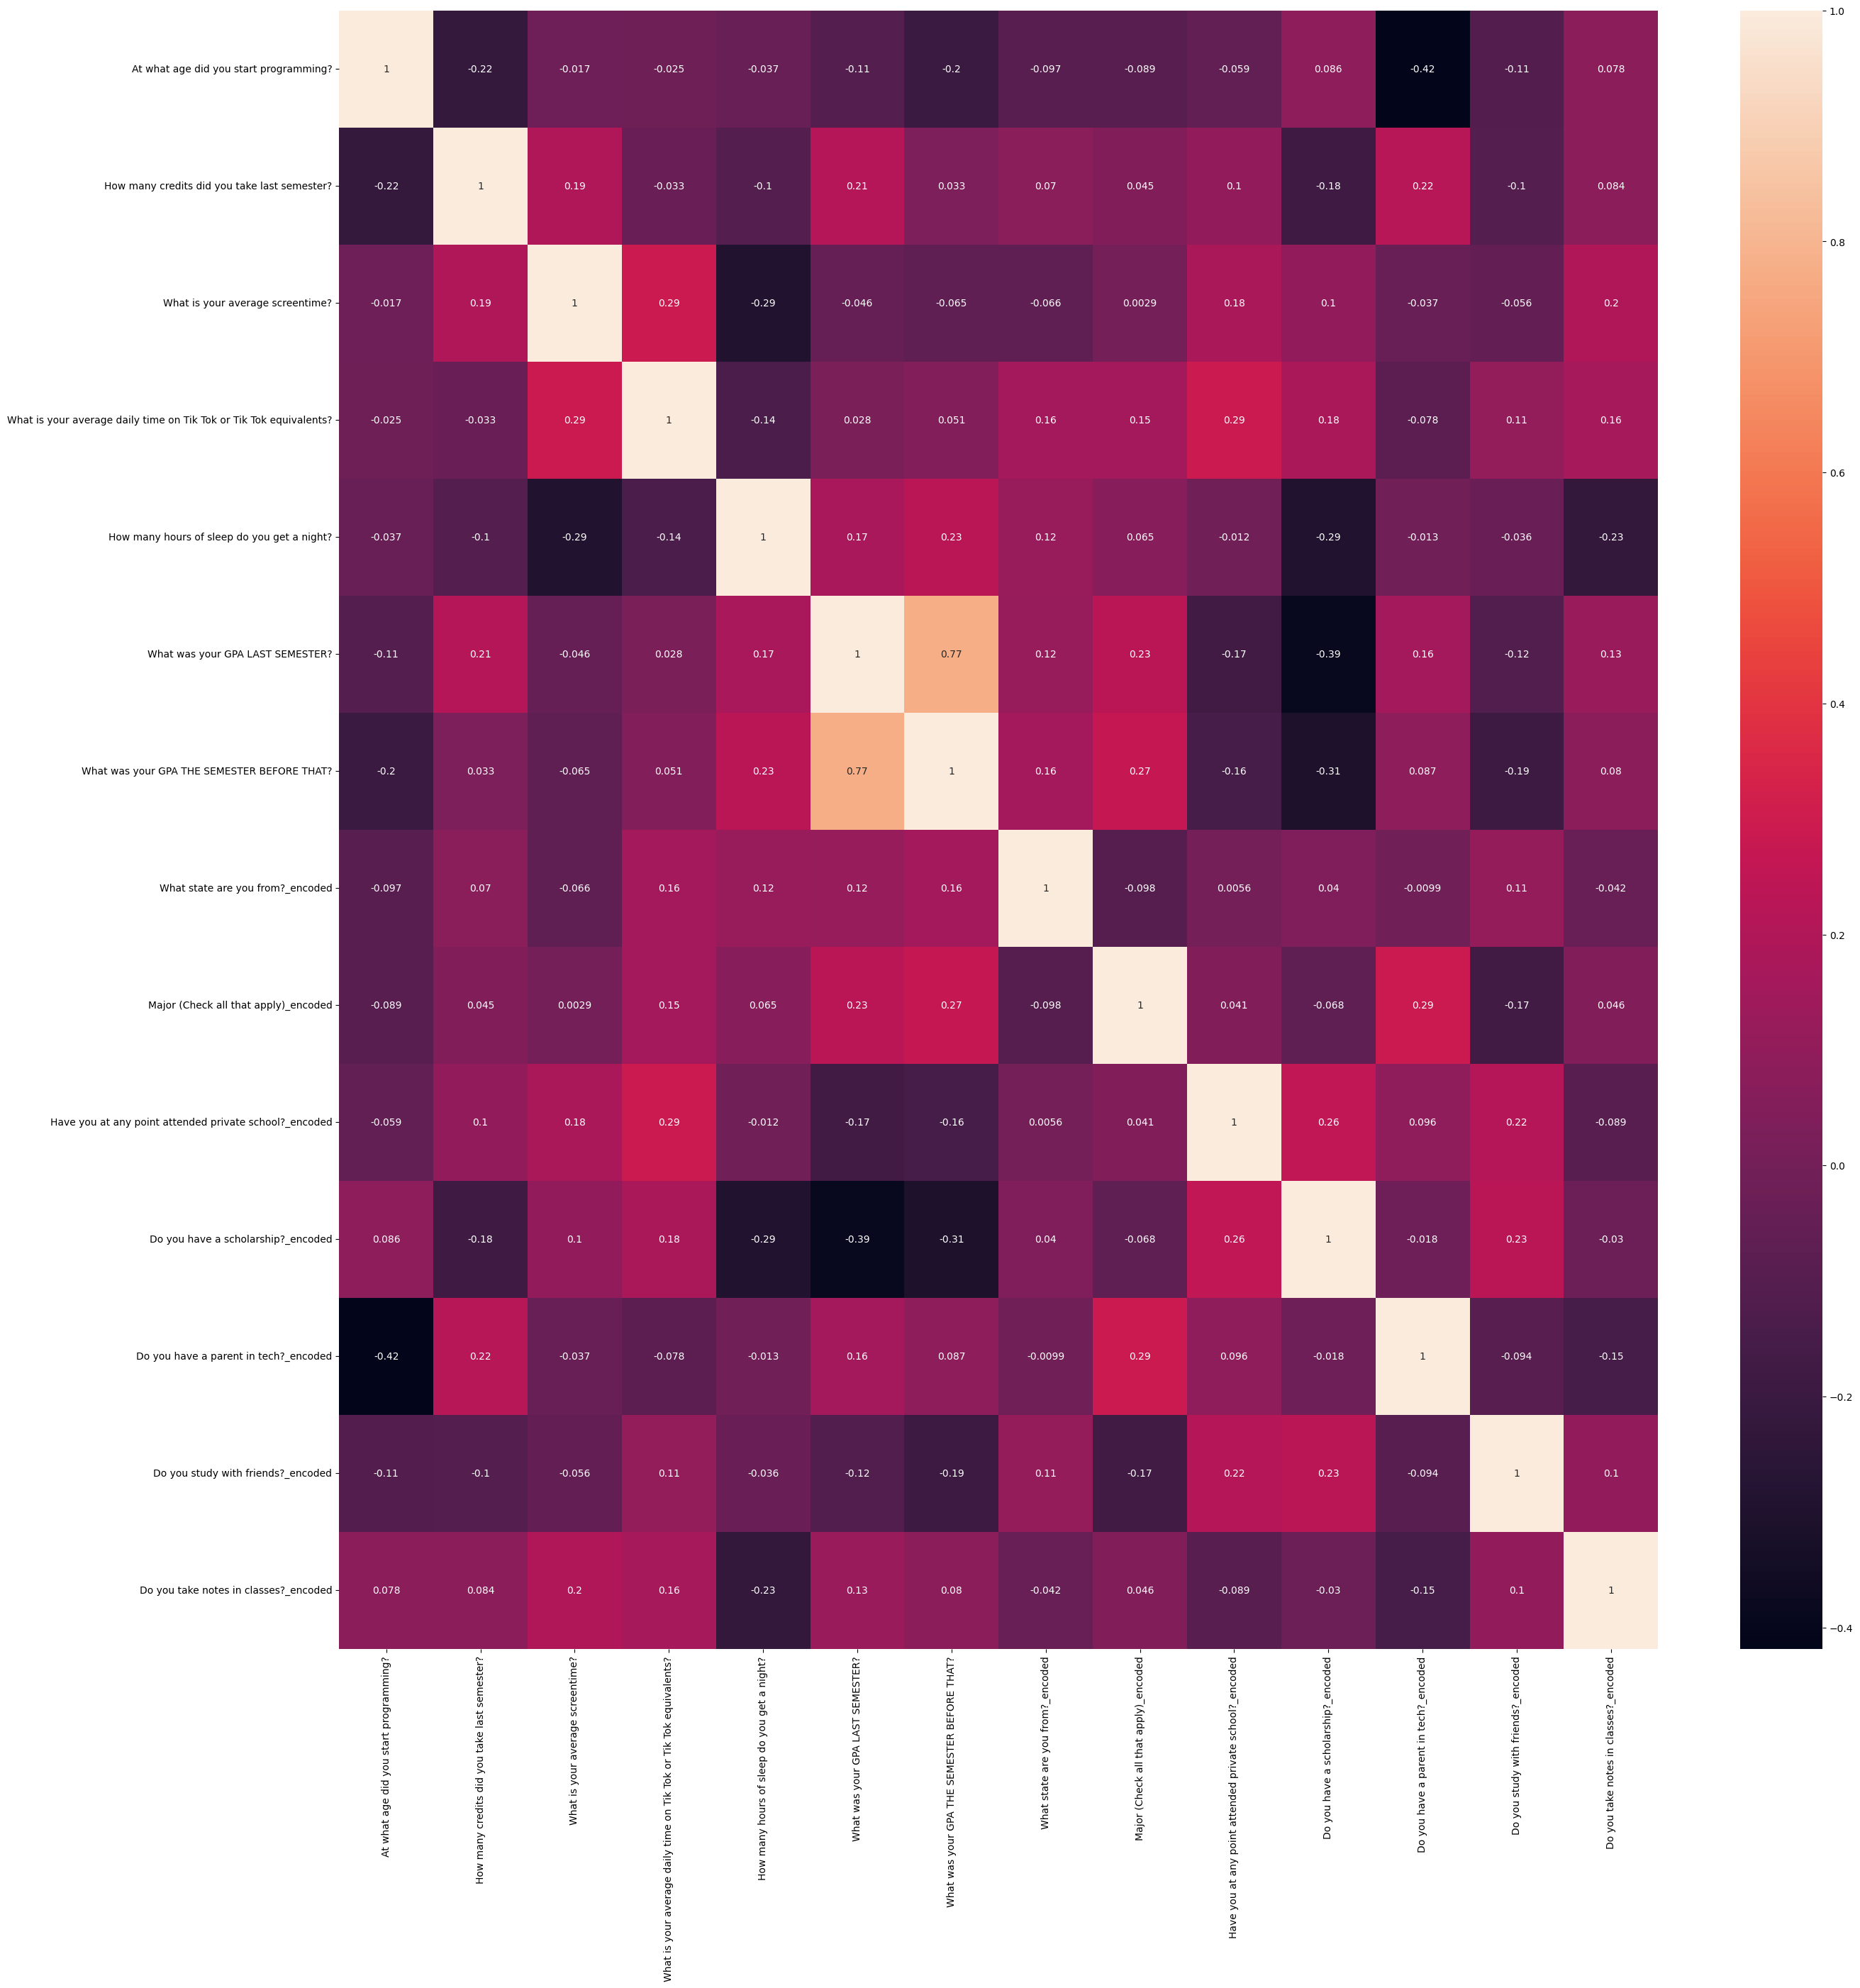

In [115]:
corr  = df_raw_encoded.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True)

**Q3 your answer:** <font color='blue'>We can see that "At what age you start programming" is highest correlated to the "both parents in tech industry"</font>

4. Which one had more impact on students' quality of sleep, the amount of screen time or course load?

In [120]:
# Group data by 'How many credits did you take last semester?'
credit_groups = df_raw_encoded.groupby('How many credits did you take last semester?')

# Group data by 'What is your average screentime?'
screentime_groups = df_raw_encoded.groupby('What is your average screentime?')

In [127]:
df_raw_encoded["How many credits did you take last semester?"].value_counts()

,count
How many credits did you take last semester?,
15,22
17,11
16,8
12,8
13,4
20,3
18,2
19,2
14,2


In [128]:
df_raw_encoded["What is your average screentime?"].value_counts()

,count
What is your average screentime?,
5.0,21
6.0,8
8.0,5
7.0,4
4.0,3
10.0,3
9.0,3
3.5,2
15.0,2


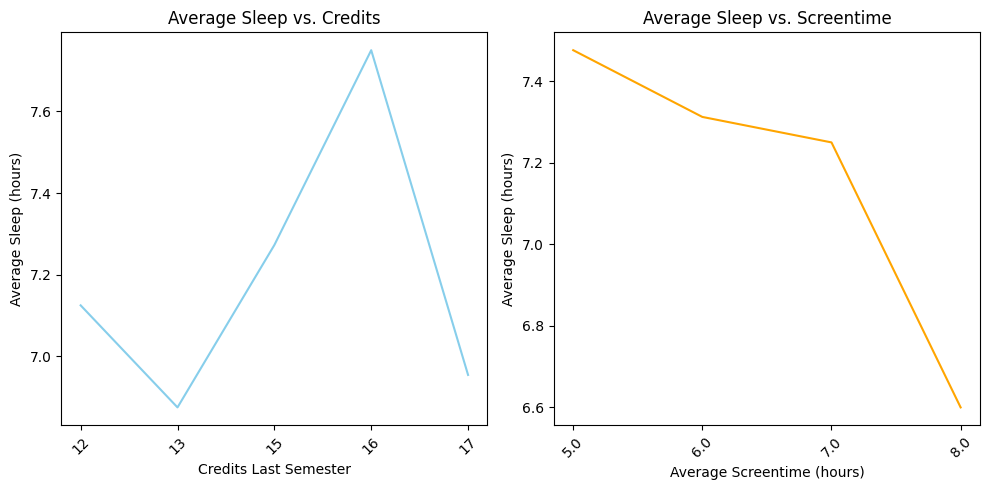

In [137]:
import matplotlib.pyplot as plt

# Step 1: Calculate the count for each group
credit_counts = credit_groups.size()
screentime_counts = screentime_groups.size()

# Step 2: Filter groups with a count greater than 1
filtered_credit_groups = credit_groups.filter(lambda x: len(x) > 3)
filtered_screentime_groups = screentime_groups.filter(lambda x: len(x) > 3)

# Step 3: Calculate the average sleep for the filtered groups
credits_avg_sleep = filtered_credit_groups.groupby('How many credits did you take last semester?')['How many hours of sleep do you get a night?'].mean()
screentime_avg_sleep = filtered_screentime_groups.groupby('What is your average screentime?')['How many hours of sleep do you get a night?'].mean()

# Plotting average sleep vs. credits
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # Create a subplot (1 row, 2 columns, 1st plot)
plt.plot(credits_avg_sleep.index.astype(str), credits_avg_sleep.values, color='skyblue')
plt.xlabel('Credits Last Semester')
plt.ylabel('Average Sleep (hours)')
plt.title('Average Sleep vs. Credits')
plt.xticks(rotation=45)  # Rotate x-axis tick labels

# Plotting average sleep vs. screentime
plt.subplot(1, 2, 2)  # Create a subplot (1 row, 2 columns, 2nd plot)
plt.plot(screentime_avg_sleep.index.astype(str), screentime_avg_sleep.values, color='orange')
plt.xlabel('Average Screentime (hours)')
plt.ylabel('Average Sleep (hours)')
plt.title('Average Sleep vs. Screentime')
plt.xticks(rotation=45)  # Rotate x-axis tick labels

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


**Q4 Your answer:** <font color='blue'>From the above graph we can see that as Average Screentime increases Average sleep time decreases so Screentime impacts more than workload</font>

5. Does having a parent (or more) in tech have impact on the starting age for programming?

**Q5 Your answer:**  <font color='blue'>If both your parents are in tech you are more than likely to start programming at younger age</font>


<Axes: xlabel='At what age did you start programming?', ylabel='Count'>

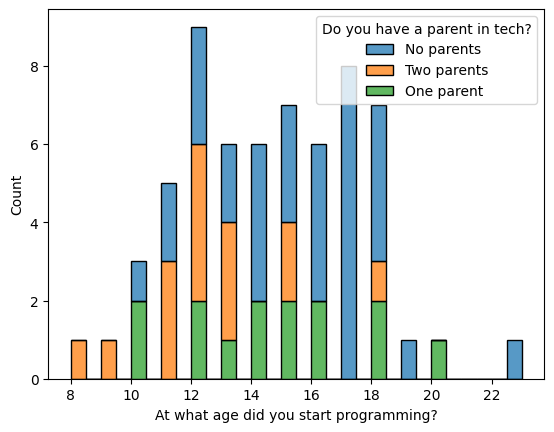

In [139]:
import seaborn as sns
sns.histplot(data=df_raw, x="At what age did you start programming?", hue='Do you have a parent in tech?', bins=30, multiple="stack")

6. Assume that the students who gave response to this survey have a consistent studying habit. Based on that assumption, does studying with friends help with grades? What about note taking?



**Q6 Your answer:** <font color='blue'>There is not statistically significant evidence to suggest a relationship between studying habit and GPA</font>

In [140]:
# Study Habits Impact on Grades

# Analyze the relationship between studying with friends and GPA
friend_study_impact = df_raw_encoded.groupby('Do you study with friends?_encoded')['What was your GPA LAST SEMESTER?'].mean()
print("Impact of studying with friends on GPA:\n", friend_study_impact)

# Analyze the relationship between note-taking and GPA
note_taking_impact = df_raw_encoded.groupby('Do you take notes in classes?_encoded')['What was your GPA LAST SEMESTER?'].mean()
print("\nImpact of note-taking on GPA:\n", note_taking_impact)

#Further analysis can be done using statistical tests like t-tests to determine the significance of these relationships.
#We can use a statistical test (t-test) to determine if the difference in average GPA between the two groups (those who study with friends and those who don't) is statistically significant.
from scipy.stats import ttest_ind

# Separate GPA scores for students who study with friends and those who don't
friends_study_gpa = df_raw_encoded[df_raw_encoded['Do you study with friends?_encoded'] == 1]['What was your GPA LAST SEMESTER?']
no_friends_study_gpa = df_raw_encoded[df_raw_encoded['Do you study with friends?_encoded'] == 0]['What was your GPA LAST SEMESTER?']

# Perform the t-test
t_stat, p_value = ttest_ind(friends_study_gpa, no_friends_study_gpa)

print(f"\nT-test results for studying with friends: t-statistic = {t_stat}, p-value = {p_value}")


# Separate GPA scores for students who take notes and those who don't
note_takers_gpa = df_raw_encoded[df_raw_encoded['Do you take notes in classes?_encoded'] == 1]['What was your GPA LAST SEMESTER?']
non_note_takers_gpa = df_raw_encoded[df_raw_encoded['Do you take notes in classes?_encoded'] == 0]['What was your GPA LAST SEMESTER?']

# Perform t-test
t_stat, p_value = ttest_ind(note_takers_gpa, non_note_takers_gpa)
print(f"\nT-test results for note-taking: t-statistic = {t_stat}, p-value = {p_value}")

#Interpret p-value
alpha = 0.05
print("\nInterpretation:")
if p_value < alpha:
  print("There is statistically significant evidence to suggest a relationship between studying habit and GPA.")
else:
  print("There is not statistically significant evidence to suggest a relationship between studying habit and GPA.")

Impact of studying with friends on GPA:
 Do you study with friends?_encoded
0    3.724455
1    3.708333
2    3.631083
Name: What was your GPA LAST SEMESTER?, dtype: float64

Impact of note-taking on GPA:
 Do you take notes in classes?_encoded
0    3.653714
1    3.673000
2    3.459385
3    3.759172
Name: What was your GPA LAST SEMESTER?, dtype: float64

T-test results for studying with friends: t-statistic = -0.14182416998971395, p-value = 0.8884027109983461

T-test results for note-taking: t-statistic = 0.14139127527008172, p-value = 0.8891312560221019

Interpretation:
There is not statistically significant evidence to suggest a relationship between studying habit and GPA.


**Q6 Your answer:** <font color='blue'>There is not statistically significant evidence to suggest a relationship between studying habit and GPA</font>